# Multishard VR Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from palettable.cubehelix import Cubehelix
import seaborn as sns
import math

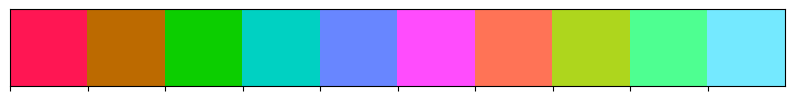

In [2]:
colors = sns.cubehelix_palette(n_colors=10, start=5, rot=4, hue=3, light=0.4, dark=.8)
sns.palplot(colors)

In [3]:
def save_fig(file_name, figure, output_dir):
    figure.patch.set_facecolor("white")
    figure.savefig(output_dir + file_name, bbox_inches="tight")

In [4]:
def create_multishard_thruput_v_latency(input_df, shards, configs, markers, num_clients, colors):
    fig, ax = plt.subplots()
    
    subsets = []
    use_marker = []
    use_color = []
    legend_labels = []
    marker_index = 0

    for config in configs:
        for shard in shards:
            subset = input_df.loc[(input_df["config"] == config) & (input_df["num_client_nodes"] == num_clients) & (input_df["num_shards"] == shard)]
            subsets.append(subset)
            legend_labels.append(f"{config}, {shard} shard")
            use_marker.append(markers[shard-1])
            use_color.append(colors[marker_index])
        marker_index += 1
        
        
    for i in range(0, len(subsets)):
        subsets[i].plot(x="num_txns", y="lat_99", ax=ax, marker=use_marker[i], color=[use_color[i]], label=legend_labels[i])
    
    ax.set_xlabel("Throughput (ops/sec)", fontsize=20)
    ax.set_ylabel("Median Latency (us)", fontsize=20)
    
    return fig, ax
    

In [5]:
def create_multishard_thruput_v_energy(input_df, shards, configs, markers, num_clients, colors):
    fig, ax = plt.subplots()
    
    subsets = []
    use_marker = []
    use_color = []
    legend_labels = []
    marker_index = 0

    for config in configs:
        for shard in shards:
            subset = input_df.loc[(input_df["config"] == config) & (input_df["num_client_nodes"] == num_clients) & (input_df["num_shards"] == shard)]
            subsets.append(subset)
            legend_labels.append(f"{config}, {shard} shard")
            use_marker.append(markers[shard-1])
            use_color.append(colors[marker_index])
        marker_index += 1
        
        
    for i in range(0, len(subsets)):
        subsets[i].plot(x="num_txns", y="energy_j", ax=ax, marker=use_marker[i], color=[use_color[i]], label=legend_labels[i], linestyle="")
    
    ax.set_xlabel("Txns")
    ax.set_ylabel("Energy (j)")

    ax.set_ylim(0, 700)
    return fig, ax
    

In [6]:
def create_multishard_thruput_v_energy_per_op(input_df, shards, configs, markers, num_clients, colors):
    fig, ax = plt.subplots()
    
    subsets = []
    use_marker = []
    use_color = []
    legend_labels = []
    marker_index = 0

    for config in configs:
        for shard in shards:
            subset = input_df.loc[(input_df["config"] == config) & (input_df["num_client_nodes"] == num_clients) & (input_df["num_shards"] == shard)]
            subsets.append(subset)
            legend_labels.append(f"{config}, {shard} shard")
            use_marker.append(markers[shard-1])
            use_color.append(colors[marker_index])
        marker_index += 1
        
        
    for i in range(0, len(subsets)):
        subsets[i].plot(x="lat_med", y="mj_per_op", ax=ax, marker=use_marker[i], color=[use_color[i]], label=legend_labels[i], linestyle="")
    
    ax.set_xlabel("Latency(us)",fontsize=20)
    ax.set_ylabel("Energy per op (mj/op)",fontsize=20)

    
    return fig, ax

In [7]:
vr_sharded_results = pd.read_csv("collected_results.csv")
vr_sharded_results["mj_per_op"] = (vr_sharded_results["energy_j"]*1000)/vr_sharded_results["num_txns"]
vr_sharded_results["thruput_Kops"] = vr_sharded_results["thruput"]/1000

In [67]:
vr_no_hyper_results = pd.read_csv("collected_results_no_hyper.csv")
vr_no_hyper_results["thruput_Kops"] = vr_no_hyper_results["thruput"]/1000

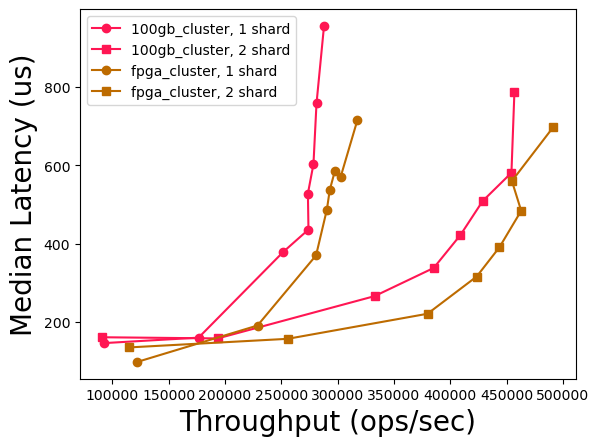

In [68]:
fig, ax = create_multishard_thruput_v_latency(vr_no_hyper_results, [1, 2], ["100gb_cluster", "fpga_cluster"], ["o", "s", "*", "v"], 1, colors)

Text(0.5, 1.0, 'Viewstamped Replication, Latency v Thruput, multiple shards')

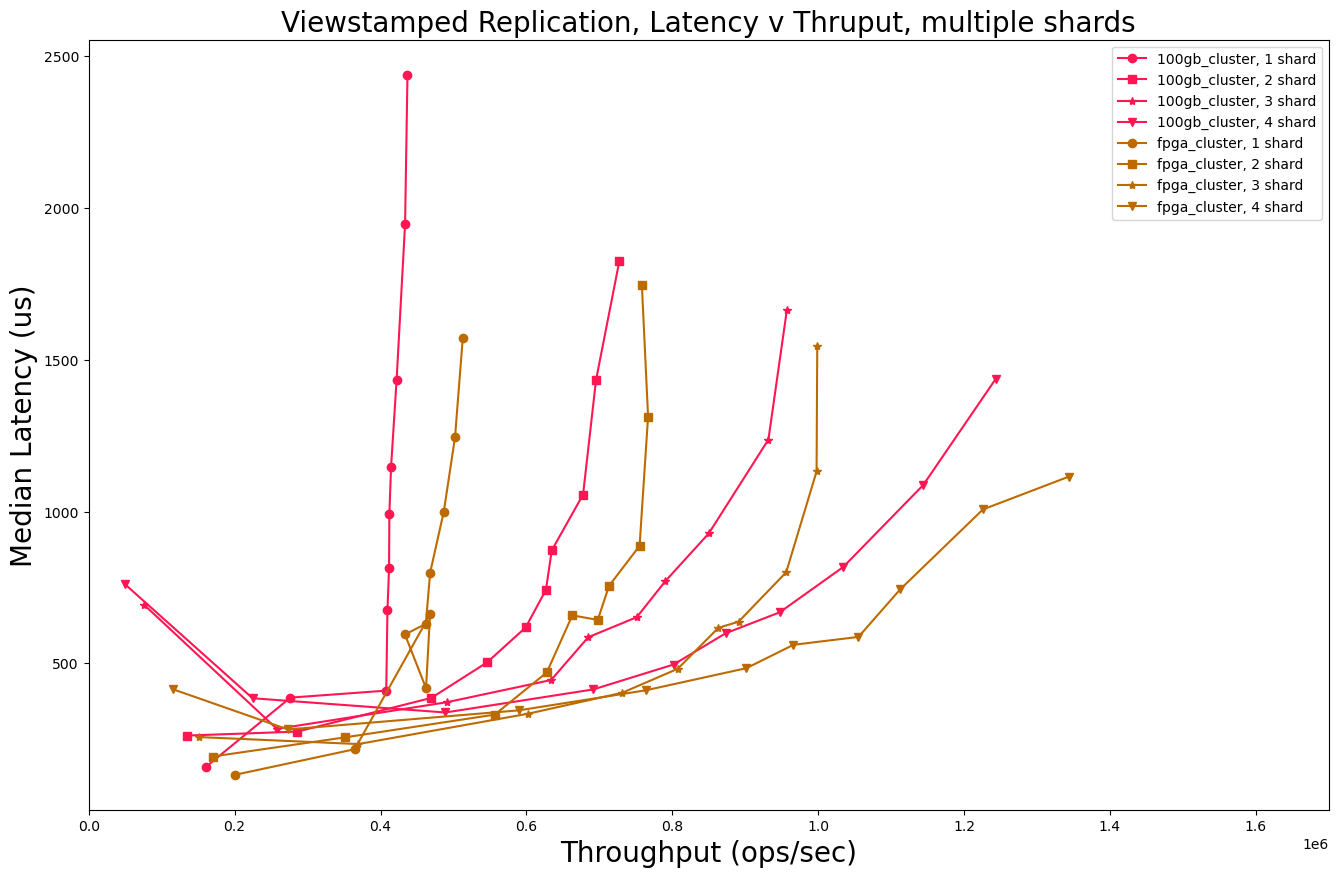

In [64]:
fig, ax = create_multishard_thruput_v_latency(vr_sharded_results, [1, 2, 3, 4], ["100gb_cluster", "fpga_cluster"], ["o", "s", "*", "v"], 2, colors)

fig.set_size_inches(16, 10)
ax.set_xlim(0, 1.7 * 10**6)
ax.set_title("Viewstamped Replication, Latency v Thruput, multiple shards", fontsize=20)

In [10]:
(105.5203 - 94.7272)/94.7272

0.11393876310077793

In [11]:
(668 - 587)/587

0.13798977853492334

In [12]:
vr_sharded_results.loc[(vr_sharded_results["num_shards"] == 4) & (vr_sharded_results["num_client_nodes"] == 2)]

,config,num_shards,num_client_nodes,num_node_threads,num_txns,thruput,lat_avg,lat_med,lat_99,energy_j,mj_per_op,thruput_Kops
70,100gb_cluster,4,2,1,49419,4941.9,395.368583,390,761,279.195861,5.649565,4.9419
71,100gb_cluster,4,2,2,224502,22450.2,171.576351,150,385,286.158875,1.274638,22.4502
72,100gb_cluster,4,2,4,488896,48889.6,157.471000,139,338,300.029541,0.613688,48.8896
73,100gb_cluster,4,2,6,691729,69172.9,167.689861,145,414,306.654602,0.443316,69.1729
74,100gb_cluster,4,2,8,801693,80169.3,193.811720,169,496,316.047485,0.394225,80.1693
75,100gb_cluster,4,2,10,873187,87318.7,222.876424,187,599,316.358338,0.362303,87.3187
76,100gb_cluster,4,2,12,947272,94727.2,247.323838,215,668,329.795654,0.348153,94.7272
77,100gb_cluster,4,2,16,1034191,103419.1,302.953674,270,817,330.607116,0.319677,103.4191
78,100gb_cluster,4,2,24,1143884,114388.4,412.325936,372,1087,329.796448,0.288313,114.3884
79,100gb_cluster,4,2,32,1243715,124371.5,506.618605,454,1438,332.523438,0.267363,124.3715


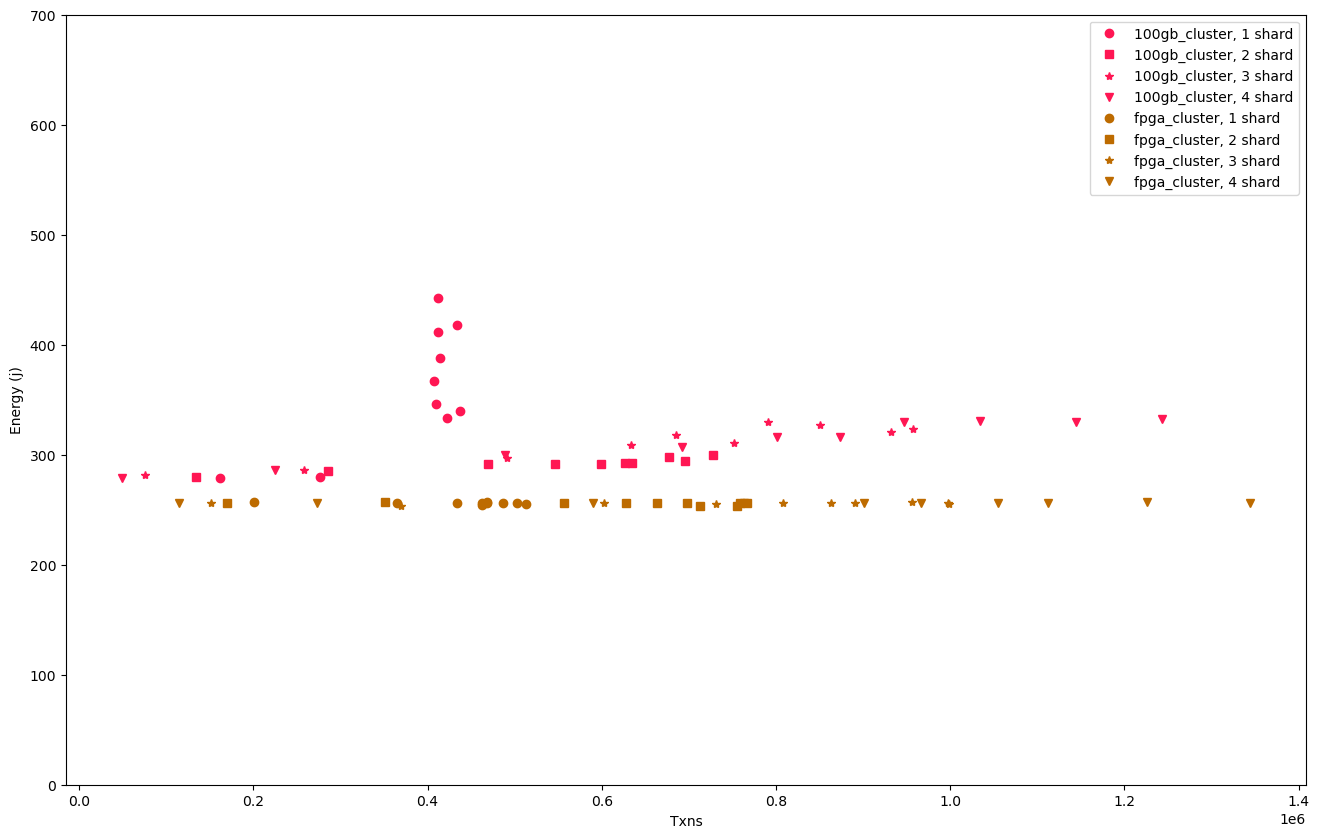

In [13]:
fig, ax = create_multishard_thruput_v_energy(vr_sharded_results, [1, 2, 3, 4], ["100gb_cluster", "fpga_cluster"], ["o", "s", "*", "v"], 2, colors)
fig.set_size_inches(16, 10)

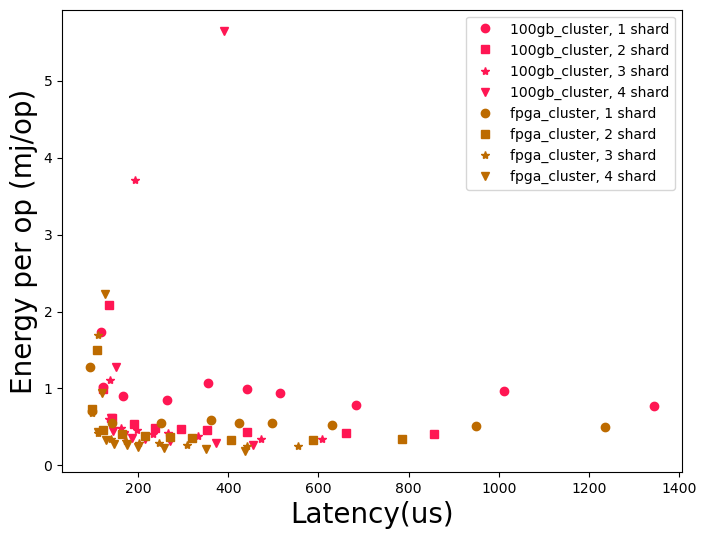

In [14]:
fig, ax = create_multishard_thruput_v_energy_per_op(vr_sharded_results, [1, 2, 3, 4], ["100gb_cluster", "fpga_cluster"], ["o", "s", "*", "v"], 2, colors)
fig.set_size_inches(8, 6)


In [15]:
vr_sharded_results.loc[vr_sharded_results["num_shards"] == 4]

,config,num_shards,num_client_nodes,num_node_threads,num_txns,thruput,lat_avg,lat_med,lat_99,energy_j,mj_per_op,thruput_Kops
60,100gb_cluster,4,1,1,18493,1849.3,530.214027,589,792,271.499023,14.681178,1.8493
61,100gb_cluster,4,1,2,59976,5997.6,326.507720,292,676,278.561462,4.644549,5.9976
62,100gb_cluster,4,1,4,265724,26572.4,145.807044,134,309,286.622314,1.078647,26.5724
63,100gb_cluster,4,1,6,425536,42553.6,136.778743,126,281,296.915040,0.697744,42.5536
64,100gb_cluster,4,1,8,599832,59983.2,130.123008,112,319,303.952820,0.506730,59.9832
65,100gb_cluster,4,1,10,687860,68786.0,142.019366,122,367,306.745910,0.445942,68.7860
66,100gb_cluster,4,1,12,733483,73348.3,160.341168,135,429,308.806274,0.421014,73.3483
67,100gb_cluster,4,1,16,817095,81709.5,192.460448,163,532,310.424072,0.379912,81.7095
68,100gb_cluster,4,1,24,963989,96398.9,245.331375,214,675,314.938781,0.326704,96.3989
69,100gb_cluster,4,1,32,1061034,106103.4,297.753653,262,831,327.993774,0.309127,106.1034


In [ ]:
vr_sharded_results_cpu = vr_sharded_results.loc[vr_sharded_results["config"] == "100gb_cluster"]
vr_sharded_results_cpu

In [11]:
vr_sharded_results_cpu.iloc[vr_sharded_results_cpu["j_per_op"].idxmax()]

config              100gb_cluster
num_shards                      4
num_client_nodes                1
num_node_threads                1
num_txns                    18493
thruput                    1849.3
lat_avg                530.214027
lat_med                       589
lat_99                        792
energy_j               271.499023
j_per_op                 0.014681
Name: 60, dtype: object

In [24]:
vr_sharded_results_cpu["j_per_op"].idxmax()

60

In [31]:
vr_sharded_results_fpga = vr_sharded_results.loc[vr_sharded_results["config"] == "fpga_cluster"]
vr_sharded_results_fpga = vr_sharded_results_fpga.reset_index()

In [32]:
vr_sharded_results_fpga.iloc[vr_sharded_results_fpga["j_per_op"].idxmax()]

index                        140
config              fpga_cluster
num_shards                     4
num_client_nodes               1
num_node_threads               1
num_txns                   37424
thruput                   3742.4
lat_avg                260.35055
lat_med                      255
lat_99                       477
energy_j              255.566253
j_per_op                0.006829
Name: 60, dtype: object

In [27]:
vr_sharded_results_perf = pd.read_csv("collected_results_perf_gov_irqs0.csv")
vr_sharded_results_perf["mj_per_op"] = (vr_sharded_results_perf["energy_j"]*1000)/vr_sharded_results_perf["num_txns"]
vr_sharded_results_perf["thruput_Kops"] = vr_sharded_results_perf["thruput"]/1000

In [28]:
vr_sharded_results_perf.drop([81], axis=0, inplace=True)

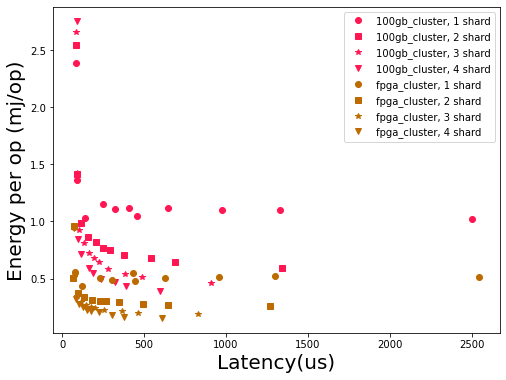

In [46]:
fig, ax = create_multishard_thruput_v_energy_per_op(vr_sharded_results_perf, [1, 2, 3, 4], ["100gb_cluster", "fpga_cluster"], ["o", "s", "*", "v"], 2, colors)
fig.set_size_inches(8, 6)

Text(0.5, 1.0, 'Viewstamped Replication, Latency v Thruput, multiple shards')

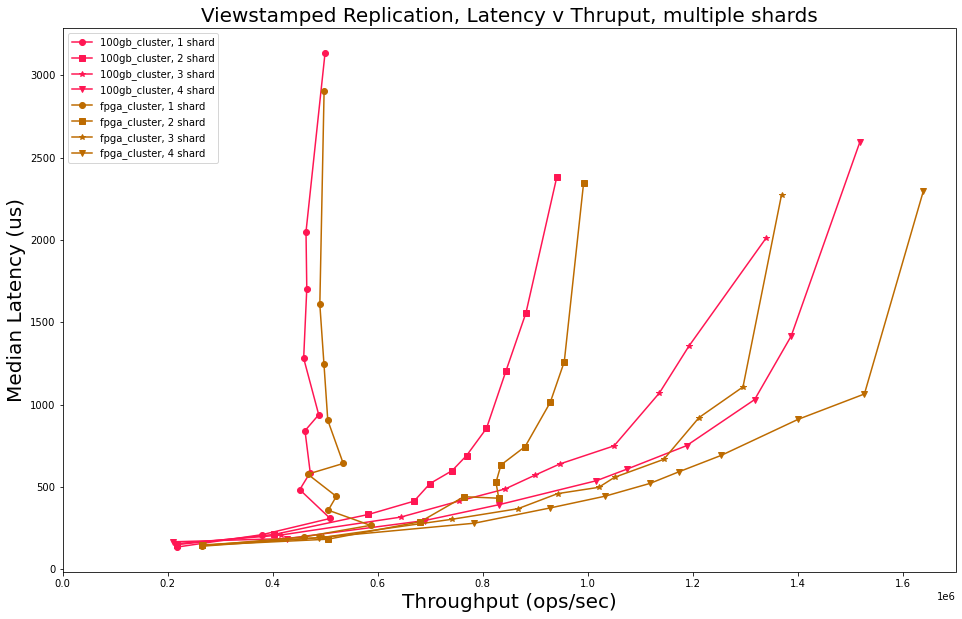

In [58]:
fig, ax = create_multishard_thruput_v_latency(vr_sharded_results_perf, [1, 2, 3, 4], ["100gb_cluster", "fpga_cluster"], ["o", "s", "*", "v"], 2, colors)

fig.set_size_inches(16, 10)
ax.set_xlim(0, 1.7 * 10**6)
ax.set_title("Viewstamped Replication, Latency v Thruput, multiple shards", fontsize=20)

In [48]:
(152.6535-138.7128)/138.7128

0.10050045850130646

In [60]:
(1417-1065)/1065

0.3305164319248826

In [54]:
vr_sharded_results_perf.loc[vr_sharded_results_perf["num_shards"] == 4]

,config,num_shards,num_client_nodes,num_node_threads,num_txns,thruput,lat_avg,lat_med,lat_99,energy_j,mj_per_op,thruput_Kops
66,100gb_cluster,4,1,1,99496,9949.6,94.580033,89,318,528.209534,5.308852,9.9496
67,100gb_cluster,4,1,2,220296,22029.6,85.839548,90,162,552.671936,2.508770,22.0296
68,100gb_cluster,4,1,4,456993,45699.3,83.782496,72,191,581.714234,1.272917,45.6993
69,100gb_cluster,4,1,6,613705,61370.5,94.370817,81,248,590.195312,0.961692,61.3705
70,100gb_cluster,4,1,8,707737,70773.7,109.934480,91,311,589.933227,0.833549,70.7737
71,100gb_cluster,4,1,10,805117,80511.7,121.182345,99,342,594.664917,0.738607,80.5117
72,100gb_cluster,4,1,12,872661,87266.1,134.515309,108,387,596.703247,0.683774,87.2661
73,100gb_cluster,4,1,16,961086,96108.6,163.363014,135,474,598.368286,0.622596,96.1086
74,100gb_cluster,4,1,24,1097577,109757.7,215.239937,187,603,600.838562,0.547423,109.7577
75,100gb_cluster,4,1,32,1192706,119270.6,264.485912,234,741,599.246399,0.502426,119.2706


# Energy

In [24]:
vr_1shard = vr_sharded_results.loc[vr_sharded_results["num_shards"] == 1]
vr_1shard_cpu = vr_1shard.loc[vr_1shard["config"] == "100gb_cluster"]
vr_1shard_cpu.iloc[vr_1shard_cpu["thruput"].idxmax()]

config              100gb_cluster
num_shards                      1
num_client_nodes                2
num_node_threads               32
num_txns                   436925
thruput                   43692.5
lat_avg               1447.498731
lat_med                      1344
lat_99                       2439
energy_j               340.003479
mj_per_op                0.778174
thruput_Kops              43.6925
Name: 19, dtype: object

In [25]:
vr_1shard_cpu.iloc[vr_1shard_cpu["mj_per_op"].idxmin()]

config              100gb_cluster
num_shards                      1
num_client_nodes                1
num_node_threads               24
num_txns                   410230
thruput                   41023.0
lat_avg                578.364754
lat_med                       533
lat_99                       1129
energy_j               297.858154
mj_per_op                0.726076
thruput_Kops               41.023
Name: 8, dtype: object

In [50]:
def get_shard_min_j_max_thru(num_shards, input_df):
    shard_df = input_df.loc[input_df["num_shards"] == num_shards]
    shard_df = shard_df.reset_index()
    shard_df.drop(["index"], axis=1, inplace=True)
    max_thru = shard_df.iloc[shard_df["thruput"].idxmax()]
    min_j = shard_df.iloc[shard_df["mj_per_op"].idxmin()]
    return (max_thru, min_j)

In [51]:
vr_cpu = vr_sharded_results.loc[vr_sharded_results["config"] == "100gb_cluster"]

In [52]:
vr_fpga = vr_sharded_results.loc[vr_sharded_results["config"] == "fpga_cluster"]
vr_fpga = vr_fpga.reset_index()
vr_fpga.drop(["index"], axis = 1, inplace=True)
vr_fpga

,config,num_shards,num_client_nodes,num_node_threads,num_txns,thruput,lat_avg,lat_med,lat_99,energy_j,mj_per_op,thruput_Kops
0,fpga_cluster,1,1,1,111247,11124.7,85.052325,93,115,256.373741,2.304545,11.1247
1,fpga_cluster,1,1,2,225203,22520.3,83.973619,88,145,253.458945,1.125469,22.5203
2,fpga_cluster,1,1,4,440514,44051.4,87.462492,76,209,255.920110,0.580958,44.0514
3,fpga_cluster,1,1,6,485570,48557.0,120.428892,105,261,256.327652,0.527890,48.5570
4,fpga_cluster,1,1,8,494712,49471.2,158.317720,141,304,256.208858,0.517895,49.4712
...,...,...,...,...,...,...,...,...,...,...,...,...
75,fpga_cluster,4,2,10,966131,96613.1,201.238048,175,561,255.799137,0.264767,96.6131
76,fpga_cluster,4,2,12,1055203,105520.3,221.378899,199,587,255.704953,0.242328,105.5203
77,fpga_cluster,4,2,16,1112583,111258.3,281.514132,257,744,256.029168,0.230121,111.2583
78,fpga_cluster,4,2,24,1225921,122592.1,384.500495,351,1007,256.825353,0.209496,122.5921


In [57]:
get_shard_min_j_max_thru(4, vr_cpu)

(config              100gb_cluster
 num_shards                      4
 num_client_nodes                2
 num_node_threads               32
 num_txns                  1243715
 thruput                  124371.5
 lat_avg                506.618605
 lat_med                       454
 lat_99                       1438
 energy_j               332.523438
 mj_per_op                0.267363
 thruput_Kops             124.3715
 Name: 19, dtype: object,
 config              100gb_cluster
 num_shards                      4
 num_client_nodes                2
 num_node_threads               32
 num_txns                  1243715
 thruput                  124371.5
 lat_avg                506.618605
 lat_med                       454
 lat_99                       1438
 energy_j               332.523438
 mj_per_op                0.267363
 thruput_Kops             124.3715
 Name: 19, dtype: object)

In [58]:
get_shard_min_j_max_thru(4, vr_fpga)

(config              fpga_cluster
 num_shards                     4
 num_client_nodes               2
 num_node_threads              32
 num_txns                 1343649
 thruput                 134364.9
 lat_avg               468.622113
 lat_med                      437
 lat_99                      1115
 energy_j               256.39739
 mj_per_op               0.190822
 thruput_Kops            134.3649
 Name: 19, dtype: object,
 config              fpga_cluster
 num_shards                     4
 num_client_nodes               2
 num_node_threads              32
 num_txns                 1343649
 thruput                 134364.9
 lat_avg               468.622113
 lat_med                      437
 lat_99                      1115
 energy_j               256.39739
 mj_per_op               0.190822
 thruput_Kops            134.3649
 Name: 19, dtype: object)

In [42]:
 255.640699/512735

0.0004985825016821555

In [62]:
(0.267-0.190)/0.267

0.28838951310861427